# Import Data

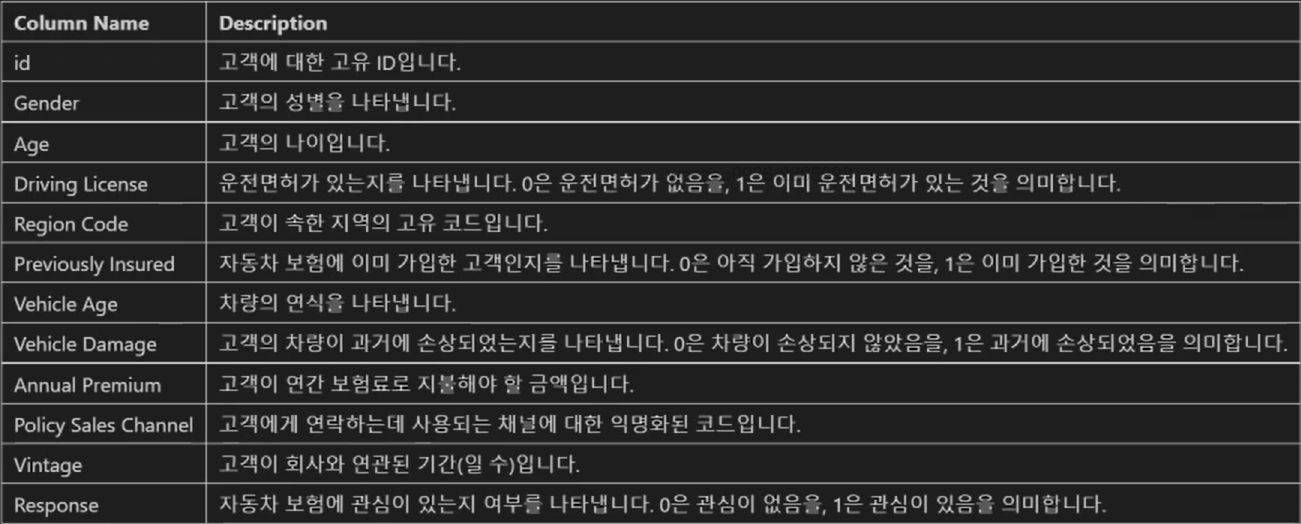

In [3]:
import pandas as pd

train_df = pd.read_csv('train.csv')

# Check Data Type

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [11]:
data_types = train_df.dtypes
objects = []

for idx in train_df.dtypes.index:
    data_type = data_types[idx]

    if data_type == 'object':
        objects.append(idx)
        print(idx)
        print(train_df[idx].value_counts())
        print()

Gender
Gender
Male      206089
Female    175020
Name: count, dtype: int64

Vehicle_Age
Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64

Vehicle_Damage
Vehicle_Damage
Yes    192413
No     188696
Name: count, dtype: int64



In [13]:
# Gender

gender_mapping = {'Female' : 0, 'Male' : 1}
train_df['Gender'] = train_df['Gender'].map(gender_mapping)

In [15]:
# Vehicle Age

vehicle_age_mapping = {'< 1 Year' : 0, '1-2 Year' : 1, '> 2 Years' : 2}
train_df['Vehicle_Age'] = train_df['Vehicle_Age'].map(vehicle_age_mapping)

In [16]:
# Vehicle Damage

vehicle_damage_mapping = {'No' : 0, 'Yes' : 1}
train_df['Vehicle_Damage'] = train_df['Vehicle_Damage'].map(vehicle_damage_mapping)

In [19]:
for col in objects:
    print(col)
    print(train_df[col].value_counts())
    print()

Gender
Gender
1    206089
0    175020
Name: count, dtype: int64

Vehicle_Age
Vehicle_Age
1    200316
0    164786
2     16007
Name: count, dtype: int64

Vehicle_Damage
Vehicle_Damage
1    192413
0    188696
Name: count, dtype: int64



In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int64  
 7   Vehicle_Damage        381109 non-null  int64  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 34.9 MB


# Check Survey Result

In [22]:
train_df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

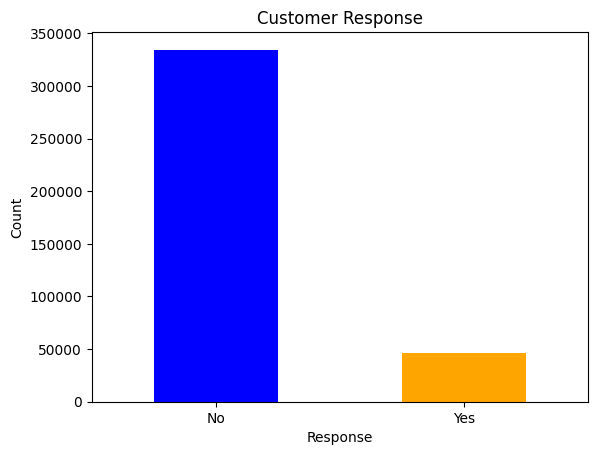

In [28]:
import matplotlib.pyplot as plt

train_df['Response'].value_counts().plot(kind='bar', color=['blue','orange'])
plt.title('Customer Response')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

In [29]:
train_df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [32]:
total = len(train_df['Response'])
percent = [val/total for val in train_df['Response'].value_counts()]

percent

[0.877436638861848, 0.12256336113815208]

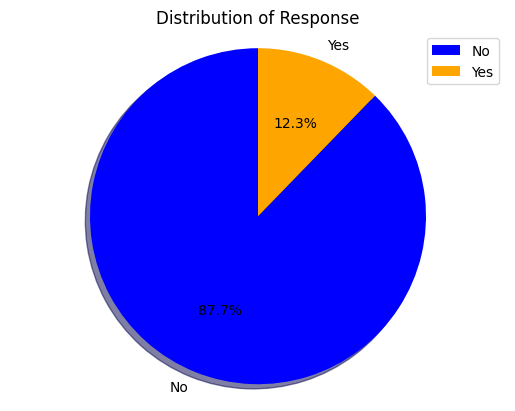

In [38]:
labels = ['No', 'Yes']

plt.pie(percent, labels=labels, autopct='%.1f%%', startangle=90, shadow=True, colors=['blue','orange'])
plt.title('Distribution of Response')
plt.axis('equal')
plt.legend(loc='upper right')
plt.show()

# Sampling

## Example

In [40]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   --------- ------------------------------ 2.1/9.3 MB 9.8 MB/s eta 0:00:01
   ---------------- ----------------------- 3.9/9.3 MB 9.4 MB/s eta 0:00:01
   -------------------------- ------------- 6.0/9.3 MB 9.5 MB/s eta 0:00:01
   ----------------------------------- ---- 8.1/9.3 MB 9.7 MB/s eta 0:00:01
   ---------------------------------------- 9.3/9.3 MB 9.3 MB/s eta 0:00:00


In [42]:
import numpy as np

arr = np.array([0,0,1,1,0])
arr == 0
sum(arr == 0)

3

In [43]:
def print_result(y, y_resampled):
    print('Before')
    print('클래스 0 샘플 수 :', sum(y==0))
    print('클래스 1 샘플 수 :', sum(y==1))

    print('After')
    print('클래스 0 샘플 수 :', sum(y_resampled == 0))
    print('클래스 1 샘플 수 :', sum(y_resampled == 1))

In [47]:
matrix = np.array([
    [1,2],
    [2,3],
    [3,4],
    [4,5],
    [5,6]
])

print(matrix[arr==0])
print(matrix[arr==0][:,0])
print(matrix[arr==0][:,1])

[[1 2]
 [2 3]
 [5 6]]
[1 2 5]
[2 3 6]


In [69]:
def visualize_sampling(X, y, X_resampled, y_resampled, method_name):
    plt.figure(figsize=(10, 5))

    # 원본 데이터 분포
    plt.subplot(1, 2, 1)
    # Class 0
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', alpha=0.5)
    # Class 1
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', alpha=0.5)
    plt.title('Original Data Distribution')
    plt.legend()

    # 리샘플링 후 데이터 분포
    plt.subplot(1, 2, 2)
    # Class 0
    plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], label='Class 0', alpha=0.5)
    # Class 1
    plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], label='Class 1', alpha=0.5)
    plt.title(f'Data Distribution after {method_name}')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [49]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

X, y = make_classification(
    n_classes=2, class_sep=2, weights=[0.1, 0.9], flip_y=0,
    n_clusters_per_class=1, n_samples=1000, random_state=10
)

In [50]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,

In [52]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)

In [53]:
print_result(y, y_resampled)

Before
클래스 0 샘플 수 : 100
클래스 1 샘플 수 : 900
After
클래스 0 샘플 수 : 900
클래스 1 샘플 수 : 900


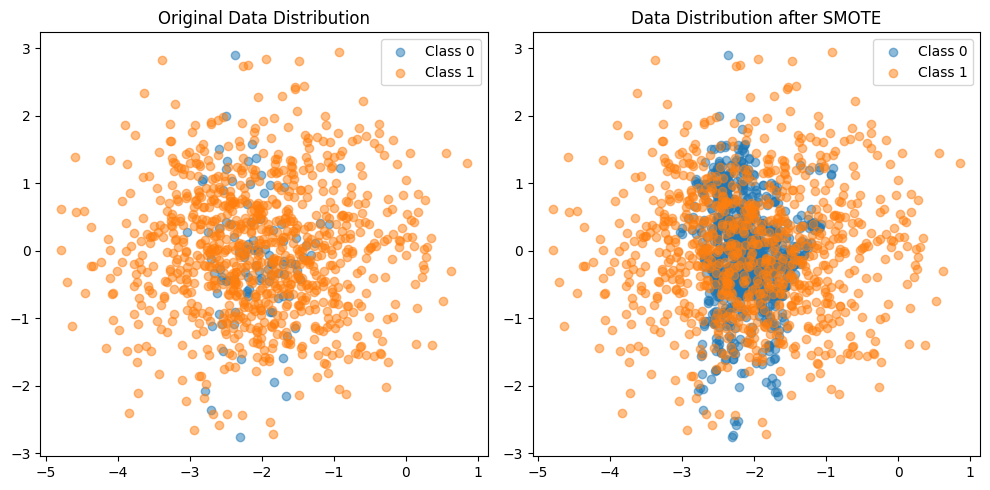

In [70]:
visualize_sampling(X, y, X_resampled, y_resampled, 'SMOTE')

In [71]:
from imblearn.under_sampling import RandomUnderSampler

X, y = make_classification(
    n_classes=2, class_sep=2, weights=[0.1, 0.9], flip_y=0,
    n_clusters_per_class=1, n_samples=1000, random_state=10
)

In [72]:
rns = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rns.fit_resample(X, y)

In [74]:
print_result(y, y_resampled)

Before
클래스 0 샘플 수 : 100
클래스 1 샘플 수 : 900
After
클래스 0 샘플 수 : 100
클래스 1 샘플 수 : 100


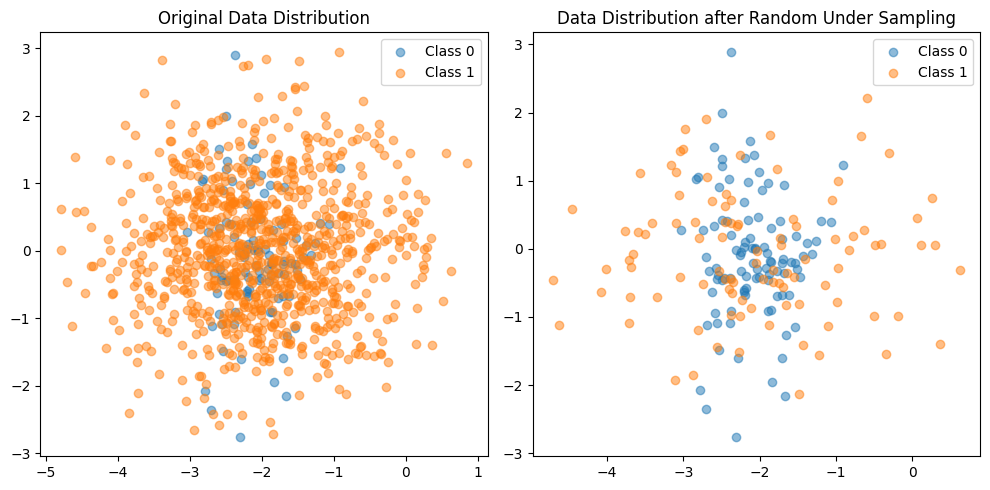

In [75]:
visualize_sampling(X, y, X_resampled, y_resampled, 'Random Under Sampling')

## Sampling Our Data

In [77]:
X = train_df.drop('Response', axis=1)
y = train_df['Response']

In [106]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X,y)

In [107]:
resampled_train_df = pd.concat([X_resampled, y_resampled], axis=1).reset_index(drop=True)

In [108]:
resampled_train_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,79510,0,22,1,19.0,1,0,0,54559.0,152.0,87,0
1,186555,1,57,1,18.0,0,1,1,33439.0,124.0,63,0
2,158037,0,64,1,28.0,0,1,1,39327.0,122.0,45,0
3,343706,1,52,1,41.0,1,1,0,26536.0,124.0,161,0
4,137903,0,21,1,7.0,0,0,0,28416.0,152.0,92,0
...,...,...,...,...,...,...,...,...,...,...,...,...
93415,381058,1,40,1,46.0,0,1,1,27508.0,26.0,189,1
93416,381062,0,41,1,28.0,0,1,1,37377.0,124.0,99,1
93417,381074,0,46,1,28.0,0,1,1,34741.0,124.0,167,1
93418,381076,0,61,1,28.0,0,1,1,43875.0,26.0,139,1


In [109]:
print('Original Class Distribution')
print(train_df['Response'].value_counts())

print('\nResampled Class Distribution')
print(resampled_train_df['Response'].value_counts())

Original Class Distribution
Response
0    334399
1     46710
Name: count, dtype: int64

Resampled Class Distribution
Response
0    46710
1    46710
Name: count, dtype: int64


# Check Distribution of Data

In [84]:
resampled_train_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,79510,0,22,1,19.0,1,0,0,54559.0,152.0,87,0
1,186555,1,57,1,18.0,0,1,1,33439.0,124.0,63,0
2,158037,0,64,1,28.0,0,1,1,39327.0,122.0,45,0
3,343706,1,52,1,41.0,1,1,0,26536.0,124.0,161,0
4,137903,0,21,1,7.0,0,0,0,28416.0,152.0,92,0
...,...,...,...,...,...,...,...,...,...,...,...,...
93415,381058,1,40,1,46.0,0,1,1,27508.0,26.0,189,1
93416,381062,0,41,1,28.0,0,1,1,37377.0,124.0,99,1
93417,381074,0,46,1,28.0,0,1,1,34741.0,124.0,167,1
93418,381076,0,61,1,28.0,0,1,1,43875.0,26.0,139,1


## Numerical

In [86]:
numerical_columns = ['Age', 'Region_Code', 'Annual_Premium', 'Vintage']

In [87]:
resampled_train_df[numerical_columns].describe()

,Age,Region_Code,Annual_Premium,Vintage
count,93420.000000,93420.000000,93420.000000,93420.000000
mean,40.819139,26.557878,30989.222265,154.683933
std,14.359740,12.641932,17695.332595,83.575008
min,20.000000,0.000000,2630.000000,10.000000
25%,27.000000,16.000000,24506.000000,82.000000
50%,41.000000,28.000000,32237.500000,155.000000
75%,50.000000,34.000000,40312.000000,227.000000
max,85.000000,52.000000,540165.000000,299.000000


In [88]:
import seaborn as sns

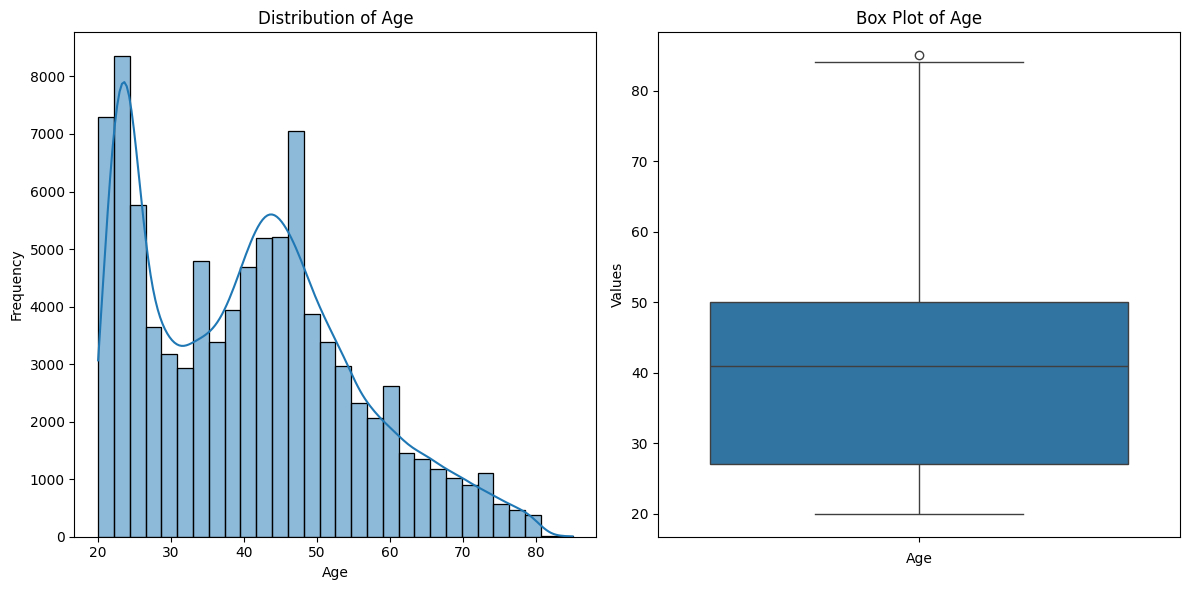

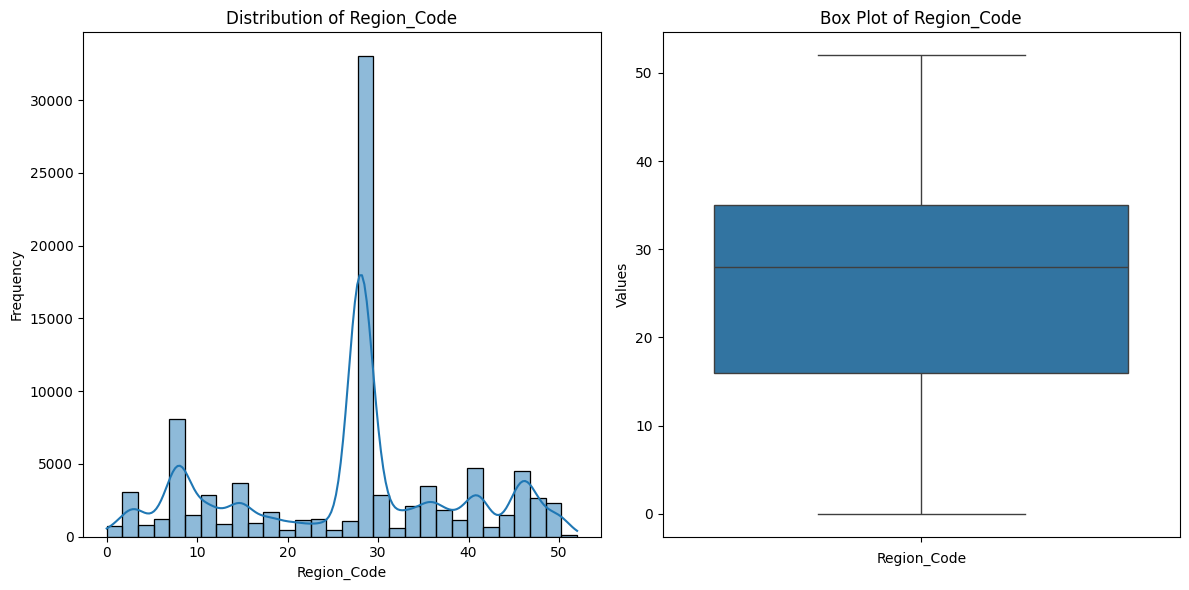

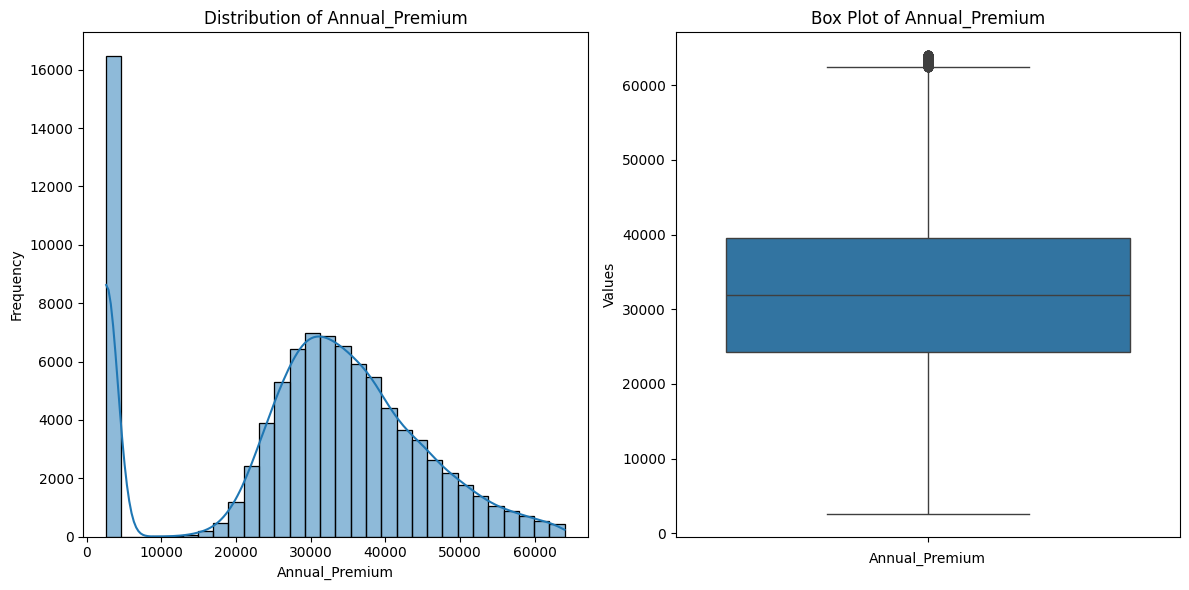

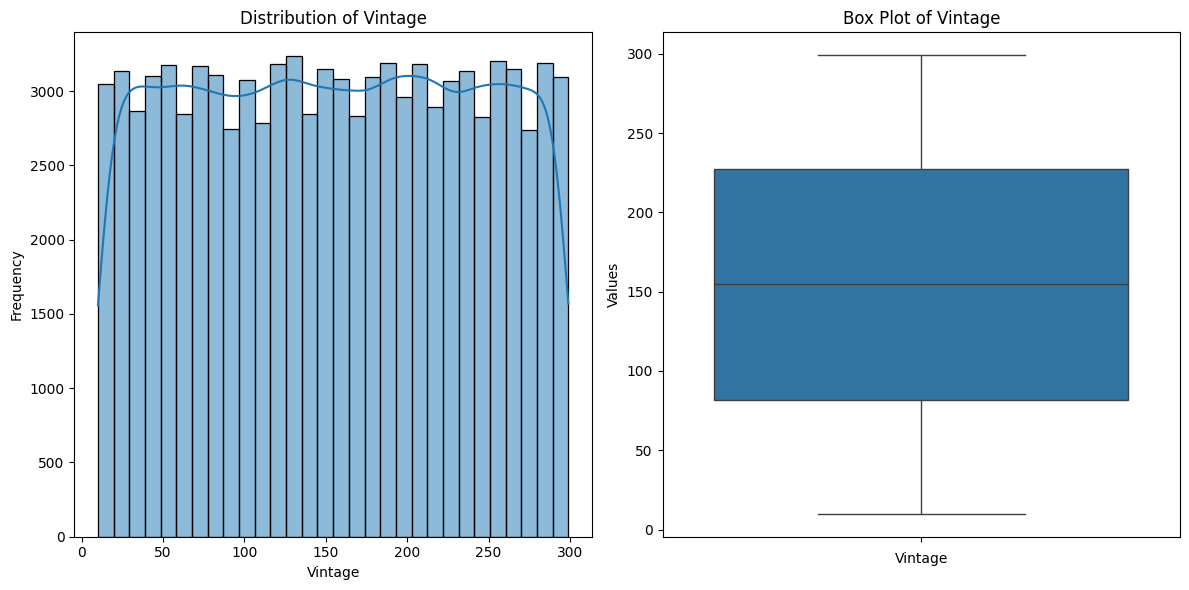

In [114]:
for col in numerical_columns:
    plt.figure(figsize=(12,6))

    plt.subplot(1,2,1)
    sns.histplot(data=resampled_train_df, x=col, bins=30, kde=True, alpha=0.5)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1,2,2)
    sns.boxplot(data=resampled_train_df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Values')

    plt.tight_layout()
    plt.show()

In [111]:
q1 = resampled_train_df['Annual_Premium'].quantile(0.25)
q3 = resampled_train_df['Annual_Premium'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = resampled_train_df[(resampled_train_df['Annual_Premium'] < lower_bound) | (resampled_train_df['Annual_Premium'] > upper_bound)]

print(f'Annual_Premium 이상치 개수 : {len(outliers)} ({(len(outliers) / len(resampled_train_df) * 100):.2f})%')

Annual_Premium 이상치 개수 : 2294 (2.46)%


In [112]:
resampled_train_df = resampled_train_df[
    (resampled_train_df['Annual_Premium'] >= lower_bound) & (resampled_train_df['Annual_Premium'] <= upper_bound)
].reset_index(drop=True)

In [113]:
resampled_train_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,79510,0,22,1,19.0,1,0,0,54559.0,152.0,87,0
1,186555,1,57,1,18.0,0,1,1,33439.0,124.0,63,0
2,158037,0,64,1,28.0,0,1,1,39327.0,122.0,45,0
3,343706,1,52,1,41.0,1,1,0,26536.0,124.0,161,0
4,137903,0,21,1,7.0,0,0,0,28416.0,152.0,92,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91121,381058,1,40,1,46.0,0,1,1,27508.0,26.0,189,1
91122,381062,0,41,1,28.0,0,1,1,37377.0,124.0,99,1
91123,381074,0,46,1,28.0,0,1,1,34741.0,124.0,167,1
91124,381076,0,61,1,28.0,0,1,1,43875.0,26.0,139,1


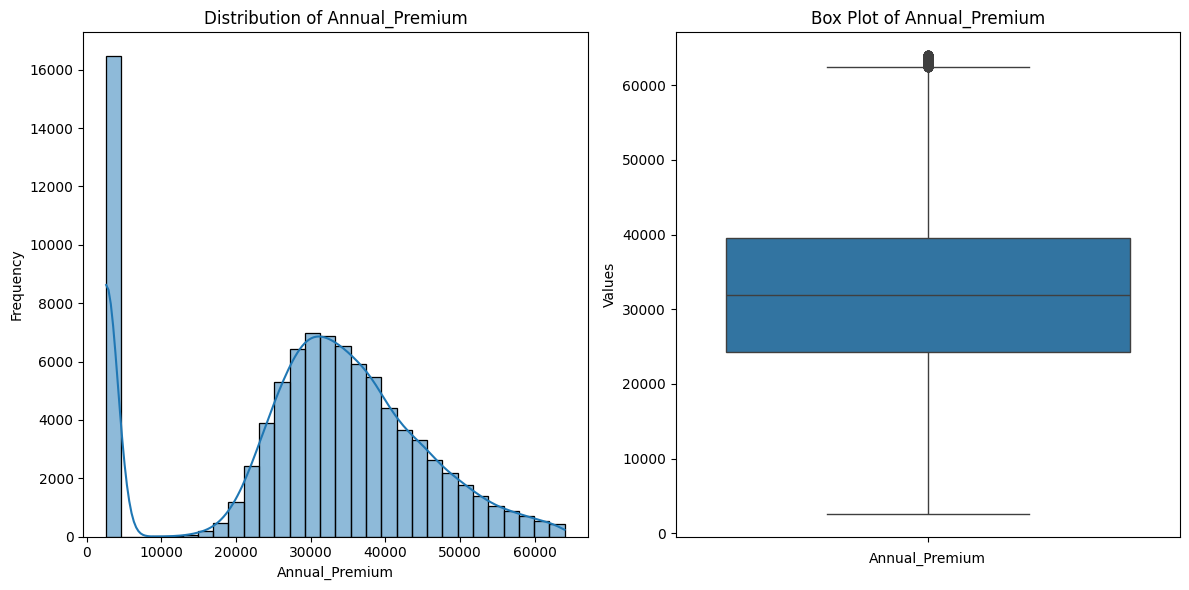

In [115]:
plt.figure(figsize=(12,6))
col = 'Annual_Premium'

plt.subplot(1,2,1)
sns.histplot(data=resampled_train_df, x=col, bins=30, kde=True, alpha=0.5)
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.boxplot(data=resampled_train_df, y=col)
plt.title(f'Box Plot of {col}')
plt.xlabel(col)
plt.ylabel('Values')

plt.tight_layout()
plt.show()

In [120]:
ap_under_10000 = resampled_train_df[resampled_train_df['Annual_Premium'] < 10000]
total = len(ap_under_10000)

ap_under_10000['Response'].value_counts() / total * 100

Response
1    51.667375
0    48.332625
Name: count, dtype: float64

## Categorical

In [121]:
resampled_train_df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [122]:
categorical_columns = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']

In [123]:
resampled_train_df[categorical_columns]

,Gender,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage
0,0,1,1,0,0
1,1,1,0,1,1
2,0,1,0,1,1
3,1,1,1,1,0
4,0,1,0,0,0
...,...,...,...,...,...
91121,1,1,0,1,1
91122,0,1,0,1,1
91123,0,1,0,1,1
91124,0,1,0,1,1


In [132]:
gender_mapping = {'Female' : 0, 'Male' : 1}
driving_license_mapping = {'No' : 0, 'Yes' : 1}
previously_insured_mapping = {'No' : 0, 'Yes' : 1}
vehicle_age_mapping = {'< 1 Year' : 0, '1-2 Year' : 1, '> 2 Years' : 2}
vehicle_damage_mapping = {'No' : 0, 'Yes' : 1}

mappings = [gender_mapping, driving_license_mapping, previously_insured_mapping, vehicle_age_mapping, vehicle_damage_mapping]

C:\Users\한동수\AppData\Local\Temp\ipykernel_19288\1616843377.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=resampled_train_df, x=col, palette='pastel')


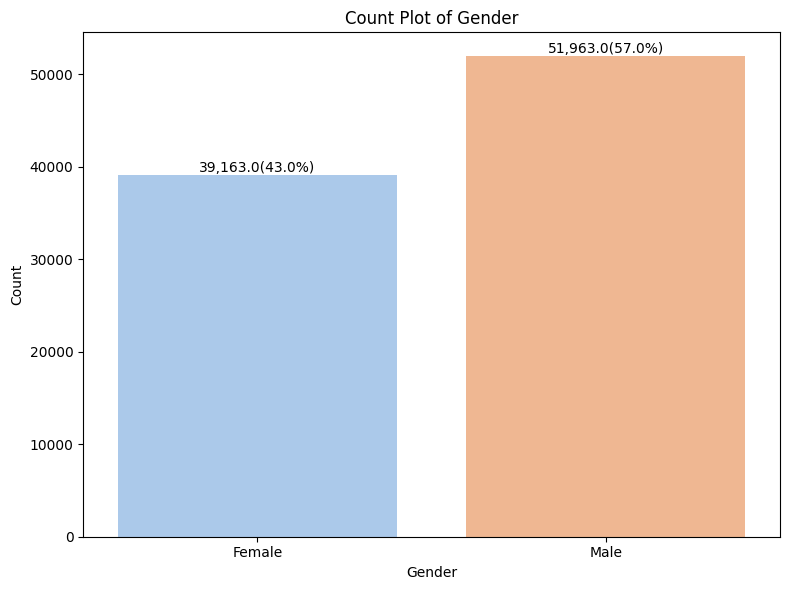

C:\Users\한동수\AppData\Local\Temp\ipykernel_19288\1616843377.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=resampled_train_df, x=col, palette='pastel')


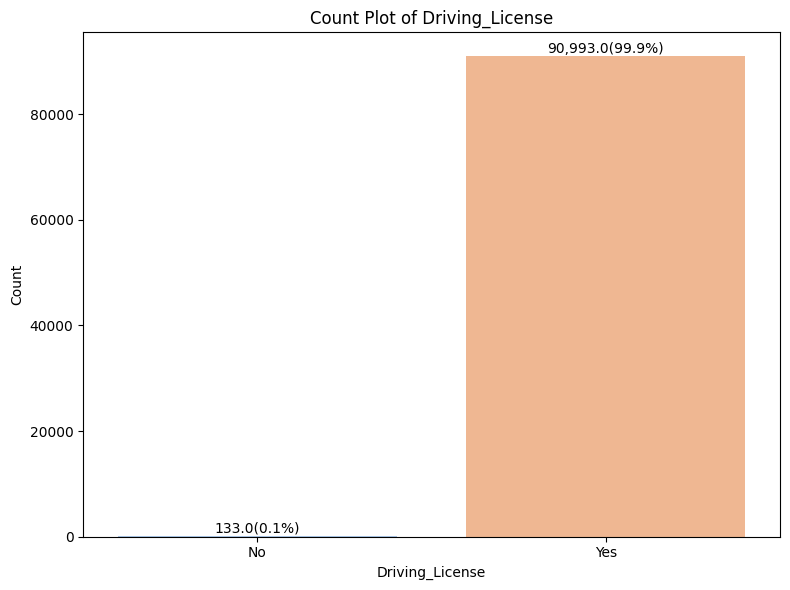

C:\Users\한동수\AppData\Local\Temp\ipykernel_19288\1616843377.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=resampled_train_df, x=col, palette='pastel')


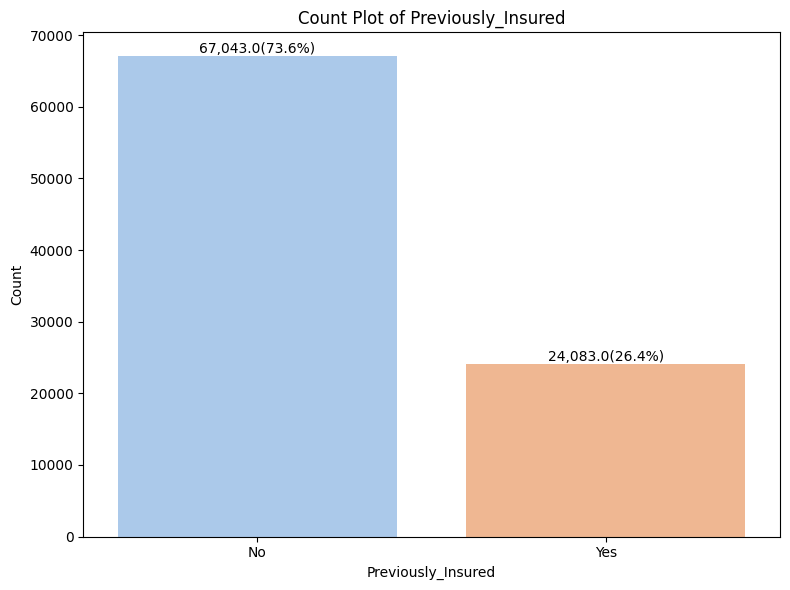

C:\Users\한동수\AppData\Local\Temp\ipykernel_19288\1616843377.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=resampled_train_df, x=col, palette='pastel')


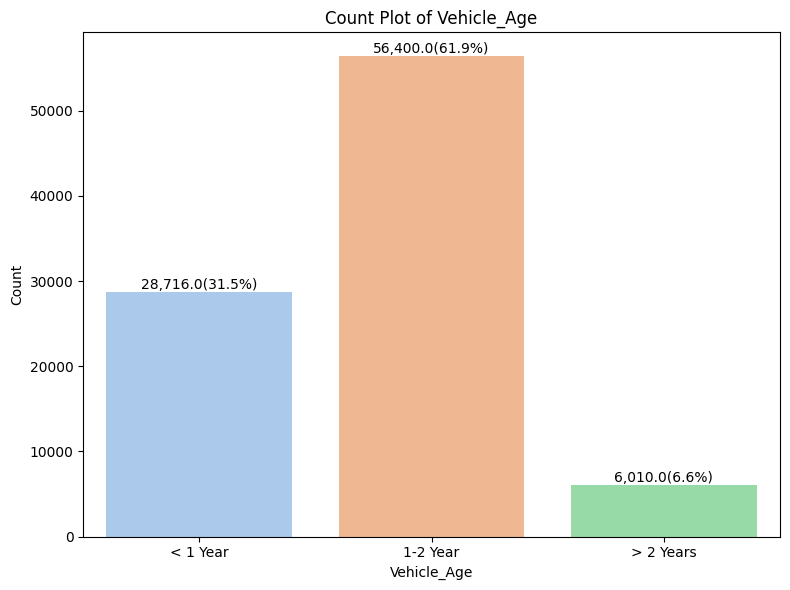

C:\Users\한동수\AppData\Local\Temp\ipykernel_19288\1616843377.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=resampled_train_df, x=col, palette='pastel')


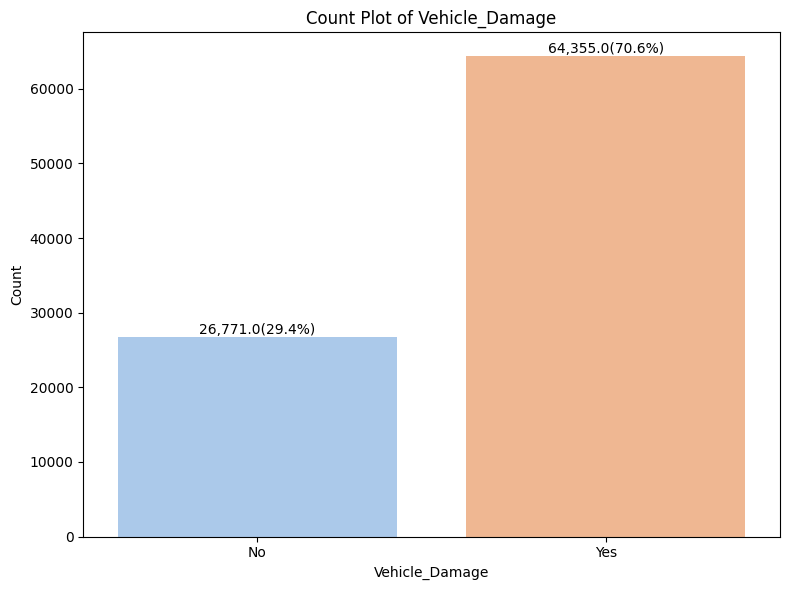

In [137]:
for idx in range(len(categorical_columns)):
    col = categorical_columns[idx]
    mapping = mappings[idx]

    plt.figure(figsize=(8,6))
    
    sns.countplot(data=resampled_train_df, x=col, palette='pastel')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(ticks=range(len(mapping)), labels=mapping.keys())

    total = len(resampled_train_df)
    for p in plt.gca().patches:
        height = p.get_height()
        plt.text(
            p.get_x() + p.get_width() / 2, height,
            f'{height:,}({height/ total:.1%})',
            ha='center', va='bottom'
        )
    
    plt.tight_layout()
    plt.show()

# Correlation with Response

In [138]:
correlation_matrix = resampled_train_df.corr()

correlation_matrix

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.005834,0.003259,-0.002297,0.000190,0.003519,-0.002481,-0.002108,0.001714,0.001803,-0.002333,-0.004053
Gender,0.005834,1.000000,0.133473,-0.015190,-0.003507,-0.090384,0.142697,0.096443,0.008031,-0.092380,-0.001088,0.080723
Age,0.003259,0.133473,1.000000,-0.062057,0.031360,-0.261088,0.709318,0.274956,0.079302,-0.518308,-0.007505,0.181575
Driving_License,-0.002297,-0.015190,-0.062057,1.000000,0.003247,-0.001206,-0.021956,-0.000677,-0.005151,0.025832,-0.000041,0.014538
Region_Code,0.000190,-0.003507,0.031360,0.003247,1.000000,-0.020591,0.032480,0.023299,0.004542,-0.034746,-0.005927,0.014525
Previously_Insured,0.003519,-0.090384,-0.261088,-0.001206,-0.020591,1.000000,-0.400767,-0.853315,-0.005179,0.225881,0.006652,-0.589715
Vehicle_Age,-0.002481,0.142697,0.709318,-0.021956,0.032480,-0.400767,1.000000,0.416050,0.057160,-0.483431,-0.003818,0.335929
Vehicle_Damage,-0.002108,0.096443,0.274956,-0.000677,0.023299,-0.853315,0.416050,1.000000,0.021661,-0.236499,-0.004752,0.596266
Annual_Premium,0.001714,0.008031,0.079302,-0.005151,0.004542,-0.005179,0.057160,0.021661,1.000000,-0.158152,0.001665,0.028373
Policy_Sales_Channel,0.001803,-0.092380,-0.518308,0.025832,-0.034746,0.225881,-0.483431,-0.236499,-0.158152,1.000000,0.004234,-0.204969


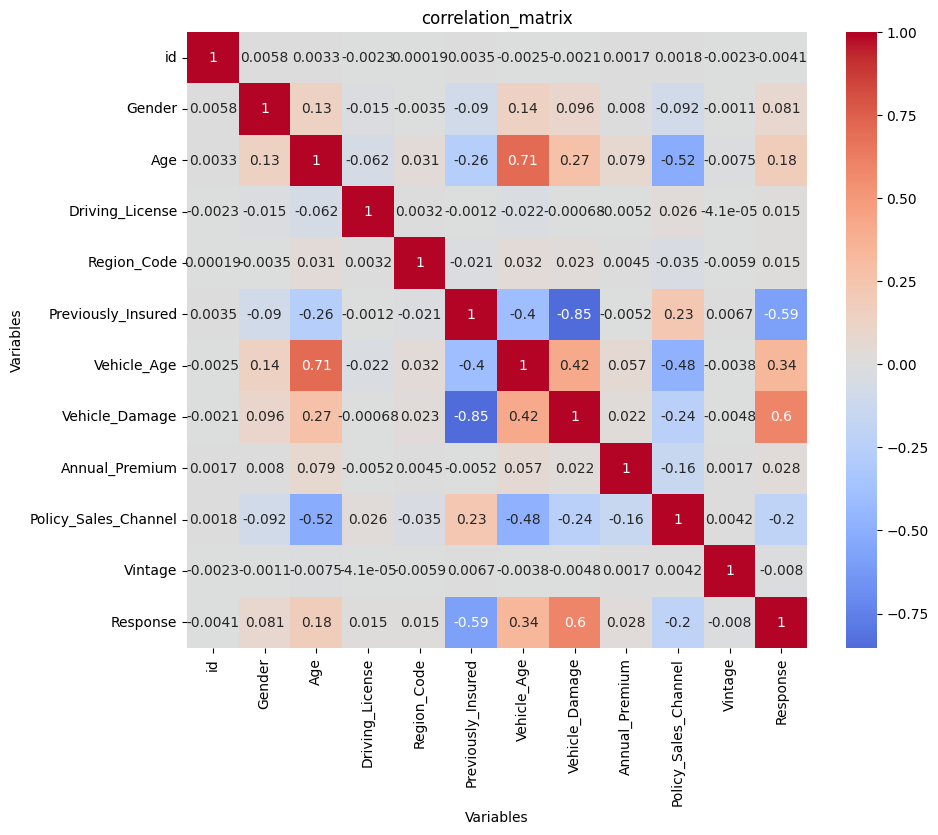

In [140]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('correlation_matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

In [ ]:
print(correlation_matrix['Response'].sort_values(ascending=False)[1:], '\n')
print(correlation_matrix['Response'].abs().sort_values(ascending=False)[1:])

Vehicle_Damage          0.596266
Vehicle_Age             0.335929
Age                     0.181575
Gender                  0.080723
Annual_Premium          0.028373
Driving_License         0.014538
Region_Code             0.014525
id                     -0.004053
Vintage                -0.007969
Policy_Sales_Channel   -0.204969
Previously_Insured     -0.589715
Name: Response, dtype: float64 

Vehicle_Damage          0.596266
Previously_Insured      0.589715
Vehicle_Age             0.335929
Policy_Sales_Channel    0.204969
Age                     0.181575
Gender                  0.080723
Annual_Premium          0.028373
Driving_License         0.014538
Region_Code             0.014525
Vintage                 0.007969
id                      0.004053
Name: Response, dtype: float64 



In [147]:
def create_count_df(data, column1, column2):
    count_df = data.groupby([column1, column2])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
    return count_df

## With Vehicle_Damage

In [148]:
response_counts_by_damage = create_count_df(resampled_train_df, 'Vehicle_Damage', 'Response')
response_counts_by_damage

,Vehicle_Damage,Response,count
0,0,0,25803
1,0,1,968
2,1,0,19906
3,1,1,44449


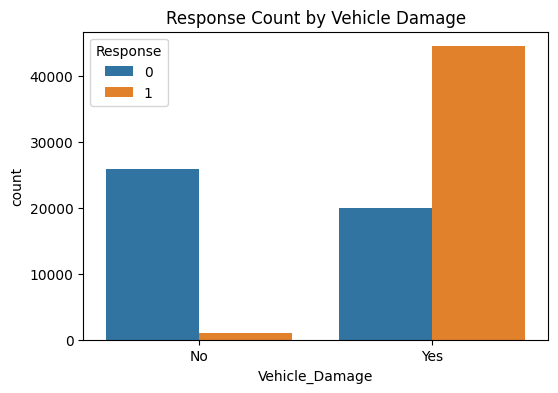

In [154]:
plt.figure(figsize=(6,4))

sns.barplot(
    x='Vehicle_Damage', y='count', hue='Response',
    data=response_counts_by_damage
)

x_labels = vehicle_damage_mapping.keys()

plt.xticks(ticks=[0,1], labels = x_labels)
plt.title('Response Count by Vehicle Damage')
plt.show()

## With Vehicle_Age

In [151]:
response_counts_by_age = create_count_df(resampled_train_df, 'Vehicle_Age', 'Response')
response_counts_by_age

,Vehicle_Age,Response,count
0,0,0,21630
1,0,1,7086
2,1,0,22483
3,1,1,33917
4,2,0,1596
5,2,1,4414


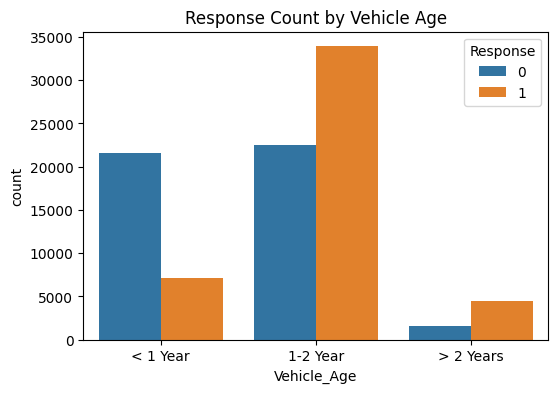

In [155]:
plt.figure(figsize=(6,4))

sns.barplot(
    x='Vehicle_Age', y='count', hue='Response',
    data=response_counts_by_age
)

x_labels = vehicle_age_mapping.keys()

plt.xticks(ticks=[0,1,2], labels = x_labels)
plt.title('Response Count by Vehicle Age')
plt.show()

## With Previously_Insured

In [157]:
response_counts_by_insured = create_count_df(resampled_train_df, 'Previously_Insured', 'Response')
response_counts_by_insured

,Previously_Insured,Response,count
0,0,0,21781
1,0,1,45262
2,1,0,23928
3,1,1,155


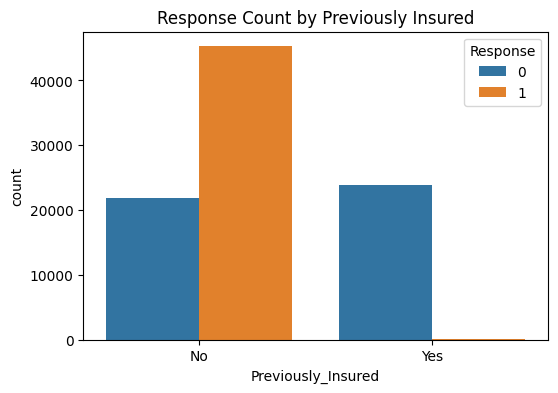

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(
    x='Previously_Insured', y='count', hue='Response',
    data=response_counts_by_insured
)

x_labels = previously_insured_mapping.keys()

plt.xticks(ticks=[0,1], labels = x_labels)
plt.title('Response Count by Previously Insured')
plt.show()

## With Annual_Premium

C:\Users\한동수\AppData\Local\Temp\ipykernel_19288\4218184279.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=resampled_train_df, x='Response', y='Annual_Premium', palette='pastel')


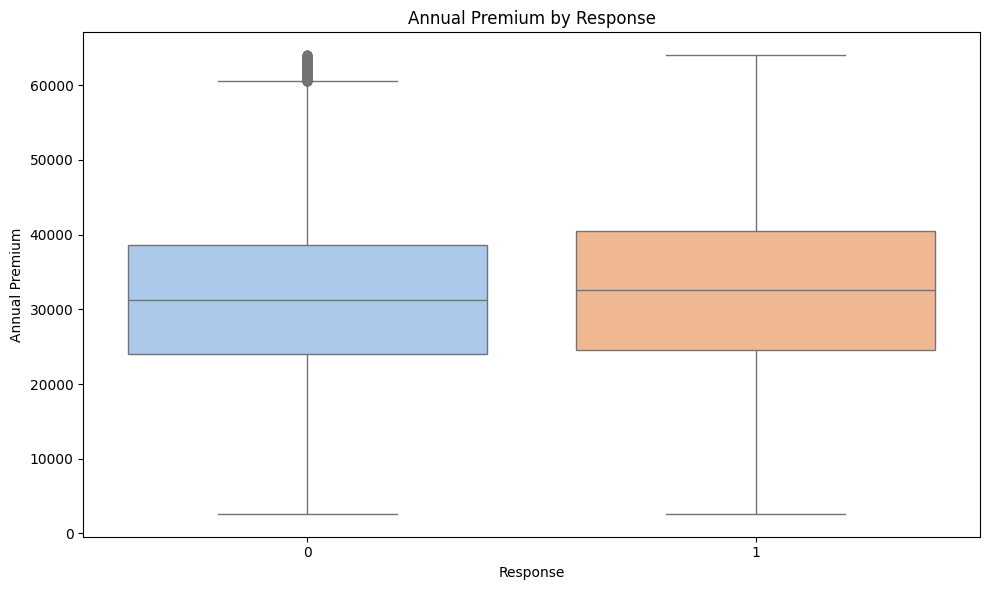

In [162]:
plt.figure(figsize=(10,6))

sns.boxplot(data=resampled_train_df, x='Response', y='Annual_Premium', palette='pastel')

plt.title('Annual Premium by Response')
plt.xlabel('Response')
plt.ylabel('Annual Premium')

plt.tight_layout()
plt.show()

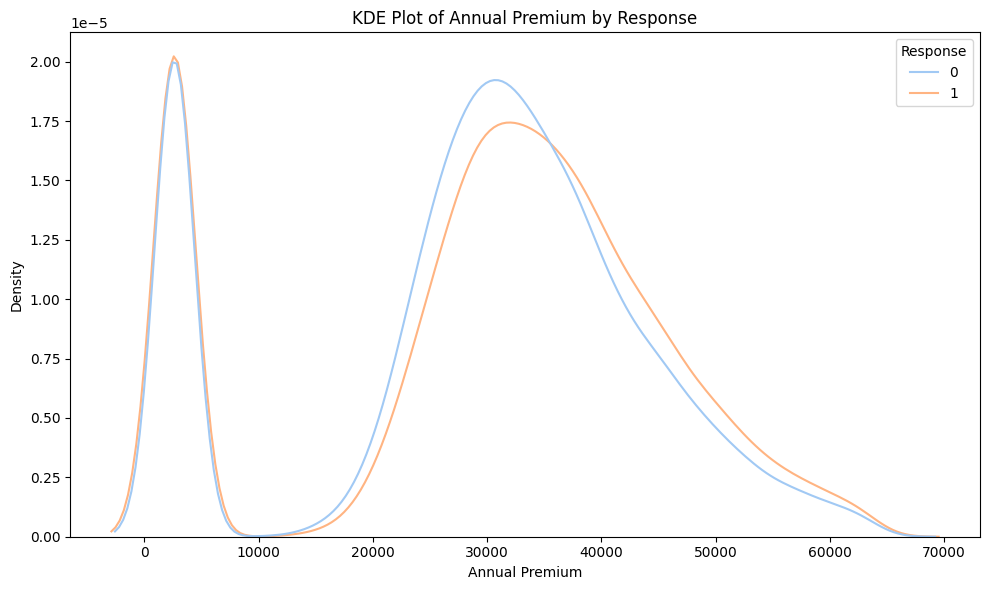

In [163]:
plt.figure(figsize=(10,6))

sns.kdeplot(data=resampled_train_df, x='Annual_Premium', hue='Response', palette='pastel')

plt.title('KDE Plot of Annual Premium by Response')
plt.xlabel('Annual Premium')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [165]:
resampled_train_df['Premium_Group'] = pd.qcut(resampled_train_df['Annual_Premium'], q=10, duplicates='drop')

premium_response_avg = resampled_train_df.groupby('Premium_Group')['Response'].mean().reset_index()  # 1에 가까울수록 긍정

C:\Users\한동수\AppData\Local\Temp\ipykernel_19288\273514093.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=premium_response_avg, x='Premium_Group', y='Response', palette='pastel')


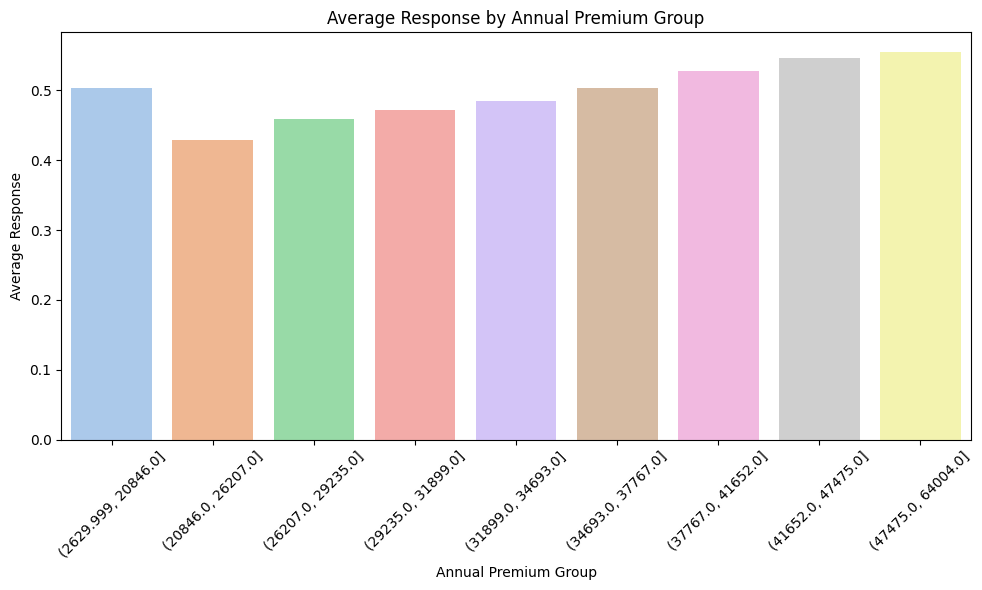

In [167]:
plt.figure(figsize=(10,6))

sns.barplot(data=premium_response_avg, x='Premium_Group', y='Response', palette='pastel')

plt.title('Average Response by Annual Premium Group')
plt.xlabel('Annual Premium Group')
plt.ylabel('Average Response')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [168]:
resampled_train_df.groupby('Premium_Group')['id'].count()

Premium_Group
(2629.999, 20846.0]    18227
(20846.0, 26207.0]      9112
(26207.0, 29235.0]      9112
(29235.0, 31899.0]      9115
(31899.0, 34693.0]      9110
(34693.0, 37767.0]      9115
(37767.0, 41652.0]      9110
(41652.0, 47475.0]      9112
(47475.0, 64004.0]      9113
Name: id, dtype: int64